# ***JAMBOREE BUSINESS CASE - LINEAR REGRESSION***

## About ***JAMBOREE***

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

## **Business Problem**

Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

## **Importing and usage of python libraries for exploration & visualization and Statistics and Probability and Linear Regression**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.graphics.tsaplots as tsap
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from statsmodels.stats.stattools import durbin_watson

In [ ]:
! gdown 1PziQGjg--6c-XQRDIMZeCFGycIyON1FS

Downloading...
From: https://drive.google.com/uc?id=1PziQGjg--6c-XQRDIMZeCFGycIyON1FS
To: /content/Jamboree_Admission.csv
100% 16.2k/16.2k [00:00<00:00, 34.2MB/s]


**Loading the dataset**

In [ ]:
df = pd.read_csv("Jamboree_Admission.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**Understanding the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


From the above we can understand that the data set consist of 500 rows of data. All the columns have numerical data either of float of int type. And there are no missing values in any of the columns.

**Statistical Data summary**

In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


From the above statistical exploration we can understand that the GRE score has a mean of 316 and that of TOEFL score is 107 and mean CGPA is 8.57 and mean chance of admit is 0.72.

**Checking for missing values in the dataset**

In [ ]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

From the above we can understand that we dont have any missing values so we dont have to do missing values handling.

**Data Clean up**

In [ ]:
df.drop('Serial No.', axis = 1, inplace= True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Here we deleted the Feature Serial No because its just the primary key of the dataset and we dont infer any knowledge from that feature.

**Checking for dupicates**

In [ ]:
df.drop_duplicates(keep='first', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


So from the above we checked for the duplicates and we cant find any duplicates which needs to be handled.

## **Visualization**

### **Univariate Analysis**

In [ ]:
bins = [0,0.6,0.75,0.9,1.0]
labels = ['No chance','low chance', 'Medium chance', 'High chance']
df['chance'] = pd.cut(x=df['Chance of Admit '], labels = labels, bins = bins)
df['chance']

0        High chance
1      Medium chance
2         low chance
3      Medium chance
4         low chance
           ...      
495    Medium chance
496      High chance
497      High chance
498       low chance
499    Medium chance
Name: chance, Length: 500, dtype: category
Categories (4, object): ['No chance' < 'low chance' < 'Medium chance' < 'High chance']

The above new feature we created to plot the categorical variable.

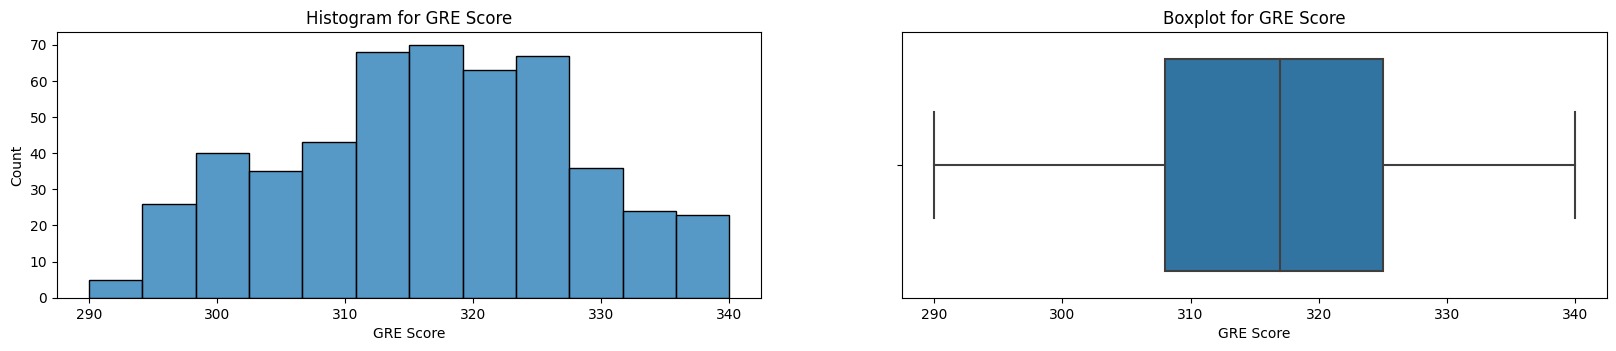

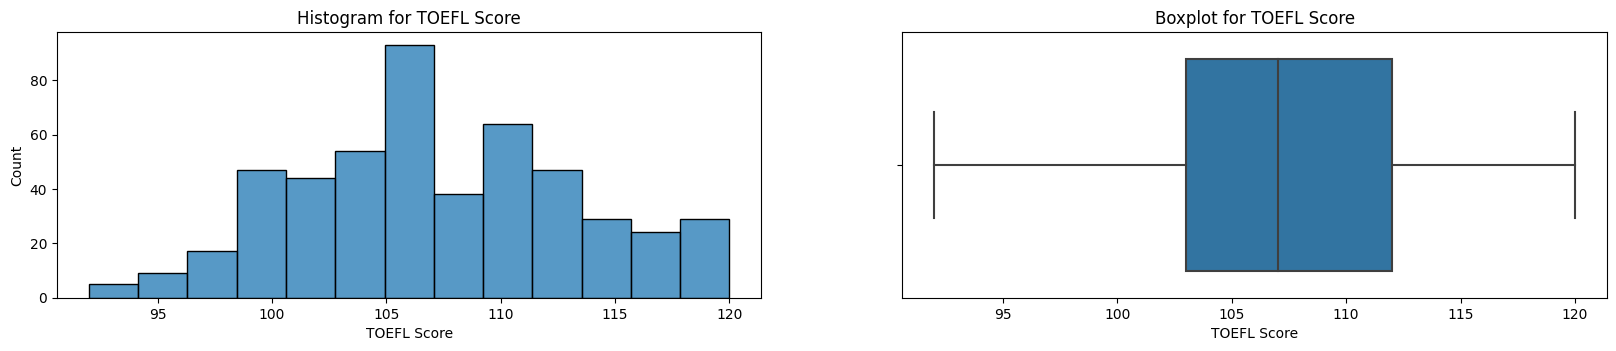

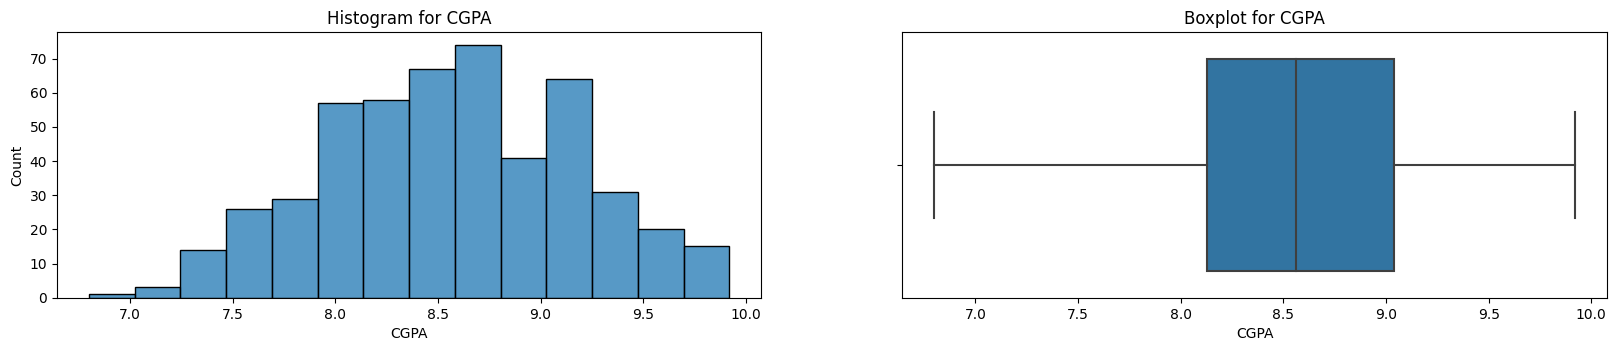

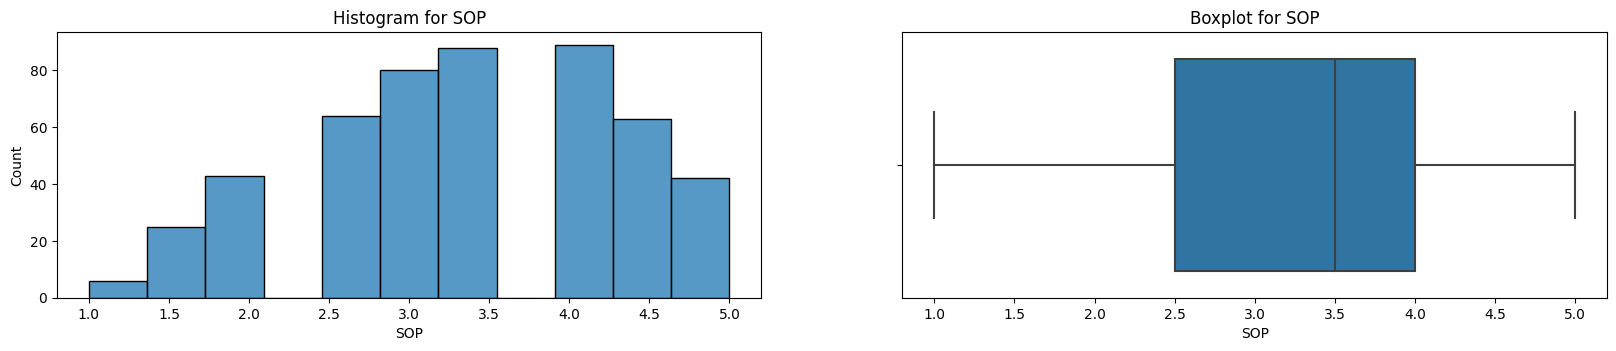

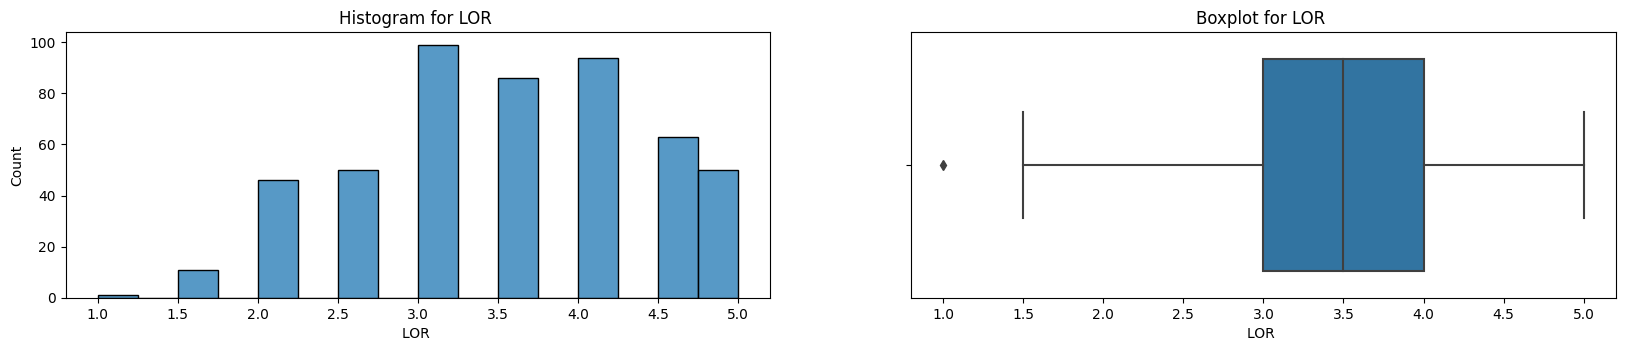

In [ ]:
#for Numerical columns
Numerical_col = ['GRE Score', 'TOEFL Score', 'CGPA', 'SOP', 'LOR ']

for i in range(len(Numerical_col)):
  plt.figure(figsize = (20, 20))
  plt.subplot(5,2,1)
  sns.histplot(data = df, x = Numerical_col[i])
  plt.title("Histogram for {}".format(Numerical_col[i]))

  plt.subplot(5,2,2)
  sns.boxplot(data = df, x = Numerical_col[i])
  plt.title("Boxplot for {}".format(Numerical_col[i]))
  plt.show()


From the above plots we can obeserve the following:

*   GRE score : majority of the students have scored between 310 to 325, with few guys scoring as less as 290 and some scoring full marks. We don't see any outliers here. 50 percentile of the students between 308 to 325. And have a mean score of 317.

*   TOEFL score : Majority of the students have scored 105 to 108. and 50 percent of the students have scored between 103 to 112 and some scoring as low as 92 and few getting full score of 120. There are no outliers for this category. The mean of TOEFL score is 107

*   CGPA : Majority of the students have a CGPA between 8.5 to 8.8 and 50 percentile of the students have scored between 8.1 to 9.0 . We dont see any outliers here but some students have scored less CGPA with just 7.0 and some have scored upto 9.8 maximum. The mean of CGPA is 8.55 around.

*   SOP : The majority of the students have a score of 3.2 to 4.2 with 50 percent of the students scoring in between 2.5 to 4.0. There are no outliers and the mean SOP score is 3.5. We could see some people scoring 1 as least and 5 as the max.

*   LOR : Most of the students have scored between 3.0 to 3.25. 50 percent of the students have scored between 3.0 to 4.0. There are few outliers at 1.0 on the lower end and this could be the natural outliers so changing that is not advisable. The mean LOR is 3.5.

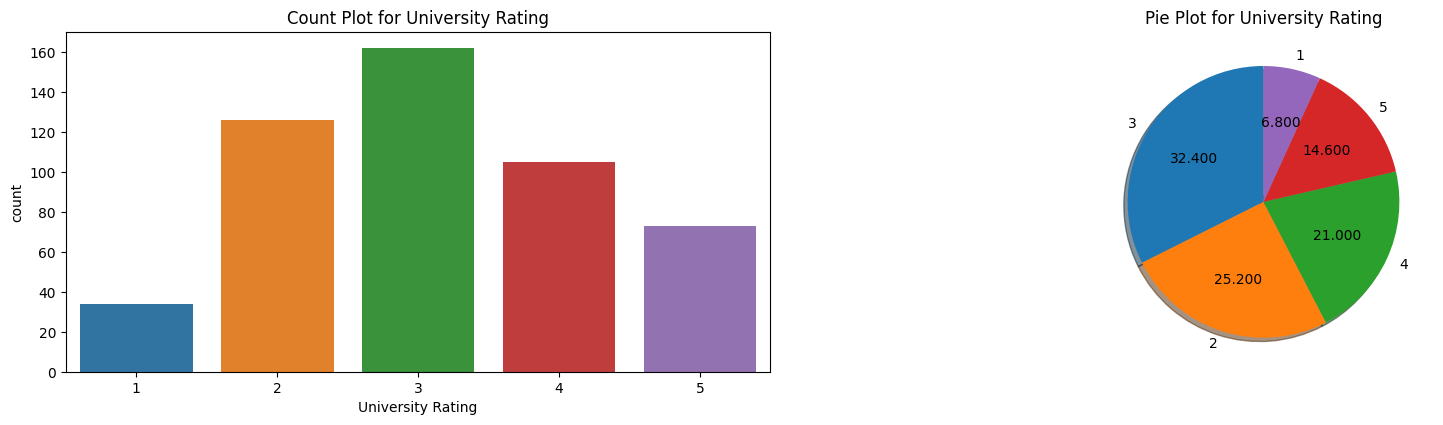

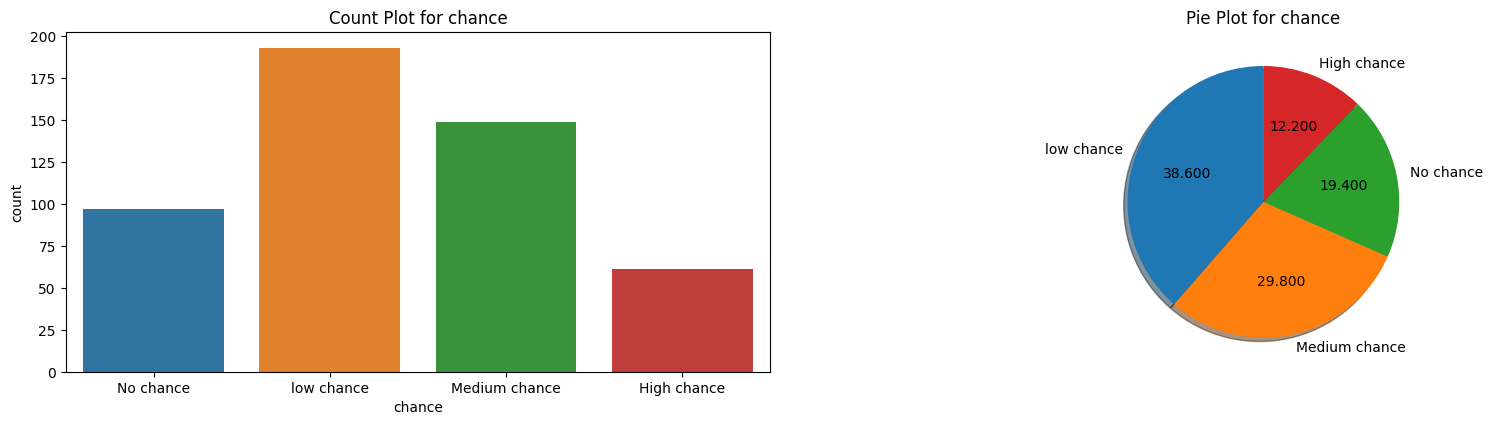

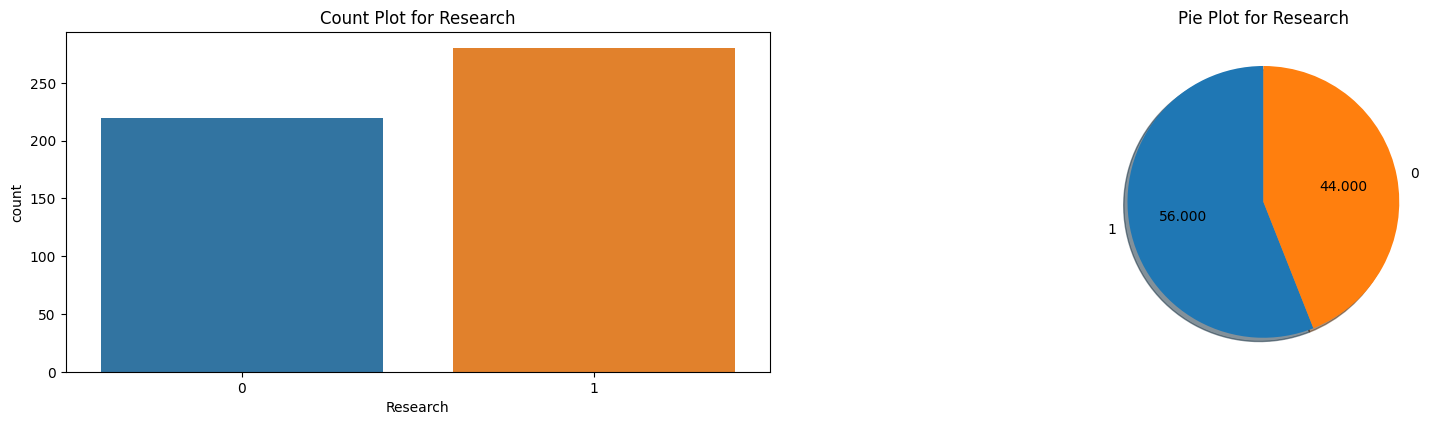

In [ ]:
#for Categorical columns
Numerical_col = ['University Rating', 'chance', 'Research']

for i in range(len(Numerical_col)):
  plt.figure(figsize = (20, 15))
  plt.subplot(3,2,1)
  sns.countplot(data = df, x = Numerical_col[i])
  plt.title("Count Plot for {}".format(Numerical_col[i]))

  plt.subplot(3,2,2)
  plt.pie(df[Numerical_col[i]].value_counts(), labels = df[Numerical_col[i]].value_counts().index, autopct = "%.3f",  shadow = True, startangle = 90)
  plt.title("Pie Plot for {}".format(Numerical_col[i]))
  plt.show()

From the above plots we can infer the following:


*   University ranking : Students with university ranking as 3 and 2 are the most followed by 4 and 5. From the pieplot we can see that 32% students has ranking as 3 followed by 2 at 25%. Students from Universities with ranking 5 are just 14%.

*   Chance of Admit : This is a new feature which we created for converting numerical to categorical. The students with high chances are 12.2 % who has 0.9 to 1 chance of admit. 29% student have medium chance and 38.6 has low chance.

*   Research : we can see that 56% of students are research opted and remaining 44% non research.






### **Bi-Variate Analysis**

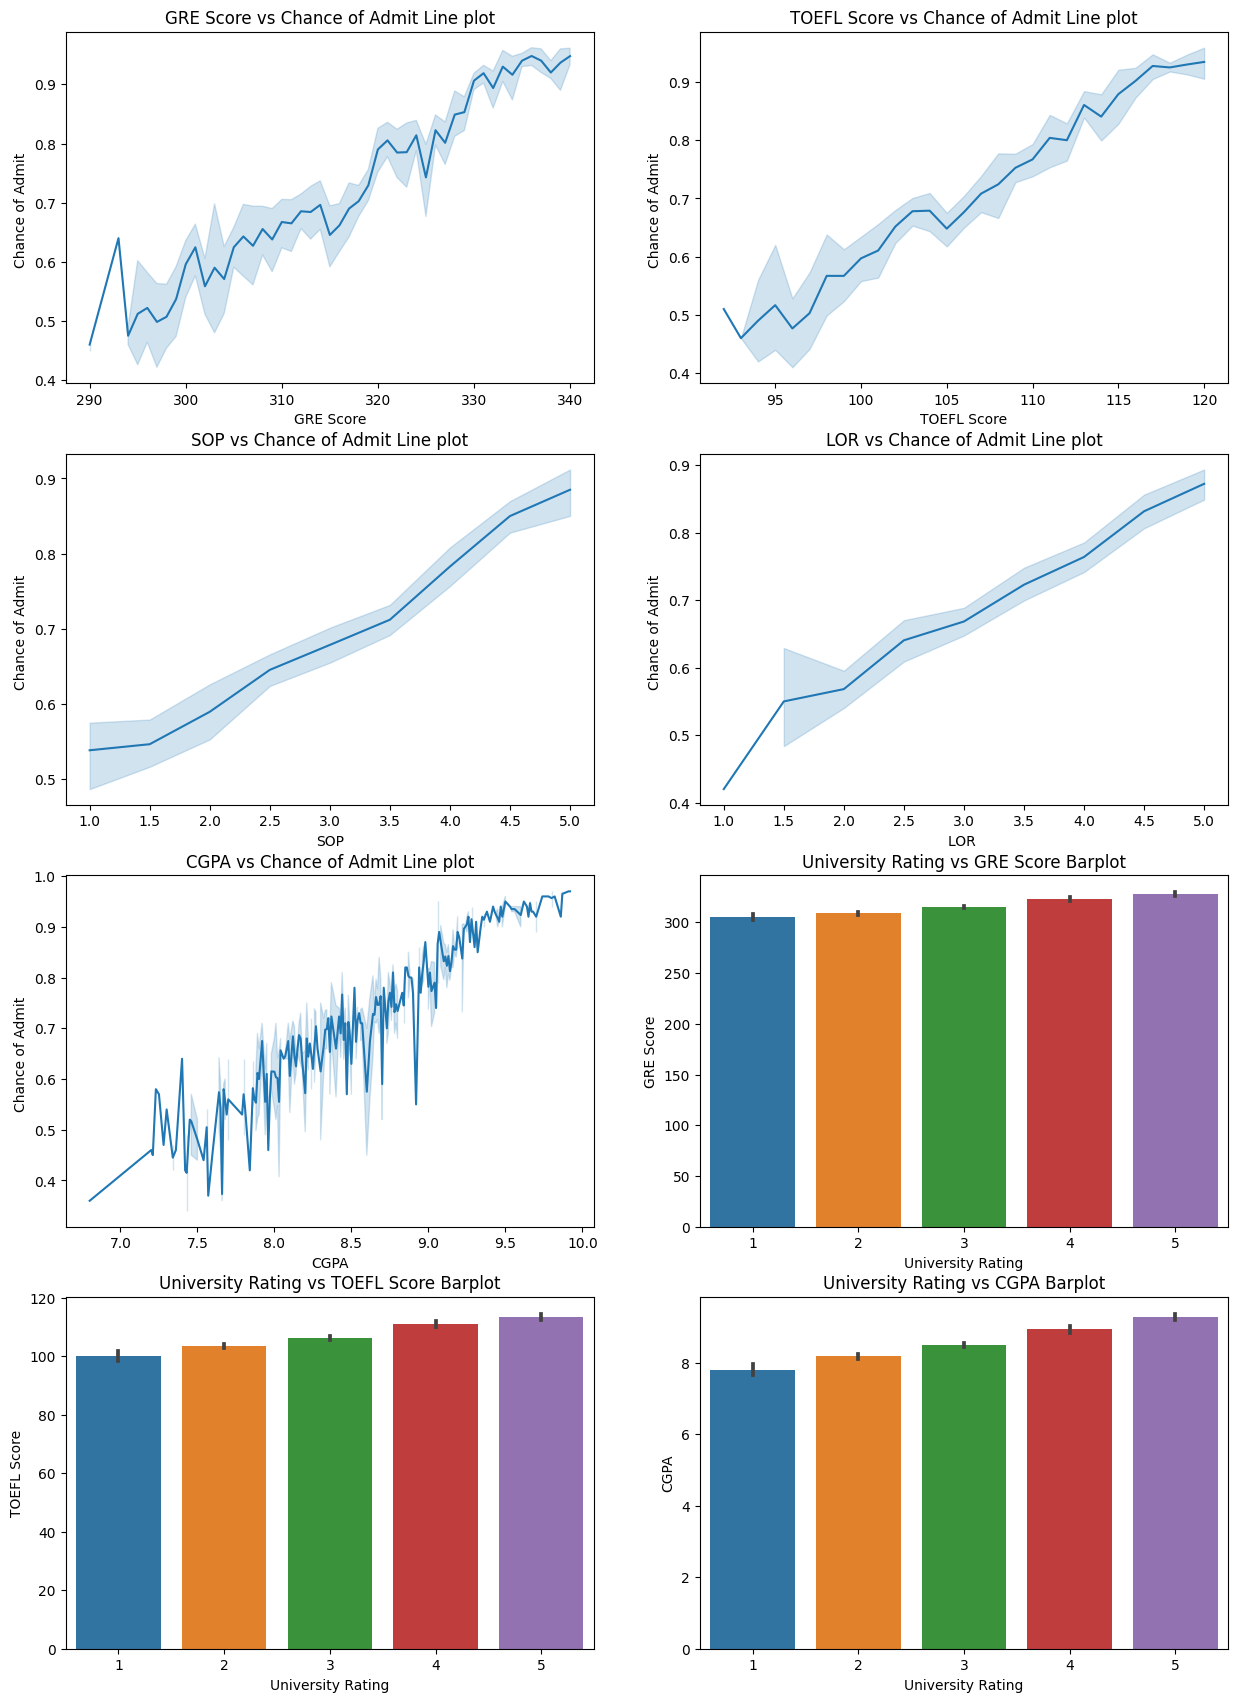

In [ ]:
# Numerical_col = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']

# for i in range(len(Numerical_col)):
#   plt.figure(figsize = (7, 5))
#   plt.subplot(3,2,i+1)
#   sns.lineplot(data = df, x = Numerical_col[i], y = 'Chance of Admit ')
#   plt.title("Line plot ".format(Numerical_col[i]))

fig , ax = plt.subplots(nrows = 4, ncols = 2, figsize = (15,21))

sns.lineplot(data = df, x = 'GRE Score', y = 'Chance of Admit ', ax = ax[0,0])
ax[0,0].set_title("GRE Score vs Chance of Admit Line plot")
sns.lineplot(data = df, x = 'TOEFL Score', y = 'Chance of Admit ', ax = ax[0,1])
ax[0,1].set_title("TOEFL Score vs Chance of Admit Line plot")
sns.lineplot(data = df, x = 'SOP', y = 'Chance of Admit ', ax = ax[1,0])
ax[1,0].set_title("SOP vs Chance of Admit Line plot")
sns.lineplot(data = df, x = 'LOR ', y = 'Chance of Admit ', ax = ax[1,1])
ax[1,1].set_title("LOR vs Chance of Admit Line plot")
sns.lineplot(data = df, x = 'CGPA', y = 'Chance of Admit ', ax = ax[2,0])
ax[2,0].set_title("CGPA vs Chance of Admit Line plot")
sns.barplot(data = df, x = 'University Rating', y = 'GRE Score', ax = ax[2,1])
ax[2,1].set_title("University Rating vs GRE Score Barplot")
sns.barplot(data = df, x = 'University Rating', y = 'TOEFL Score', ax = ax[3,0])
ax[3,0].set_title("University Rating vs TOEFL Score Barplot")
sns.barplot(data = df, x = 'University Rating', y = 'CGPA', ax = ax[3,1])
ax[3,1].set_title("University Rating vs CGPA Barplot")
plt.show()

From the above Bi variate plots we can infer the following :

*   GRE Score vs Chance of Admit Line plot : This plot shows that for higher scores of GRE the chance of Admit is increasing. Both are correlated and are linear.
*   TOEFL Score vs Chance of Admit Line plot : This plot shows that for higher scores of TOEFL the chance of Admit is increasing. Both are correlated and are linear.
*   SOP vs Chance of Admit Line plot : This plot shows us that having a well prepared SOP with good score can increase the chances of admission. Both are correlated and are linear.
*   LOR vs Chance of Admit Line plot : This plot shows us that having a well prepared LOR with good score can increase the chances of admission. Both are correlated and are linear.
*   CGPA vs Chance of Admit Line plot : We can see that CGPA has a linear relation with Chance of Admission but at some place we can see that even for good CGPA the chances was little less than the average.
*   GRE score vs University Rating bar plot : It can be observed that colleges with higher ranking like 4 and 5 have students with higher GRE scores and it gradually decreases with university ranks 1 and 2.
*   TOEFL score vs University Rating bar plot : It can be observed that colleges with higher ranking like 4 and 5 have students with higher TOEFL scores and it gradually decreases with university ranks 1 and 2.
*   CGPA vs University Rating bar plot : It can be observed that colleges with higher ranking like 4 and 5 have students with higher CGPA and it gradually decreases with university ranks 1 and 2.





### **Multivariate Analysis**

### **Plotting pair plot and heat map to understand the correlation and linearity among the features**

**Pair plot**

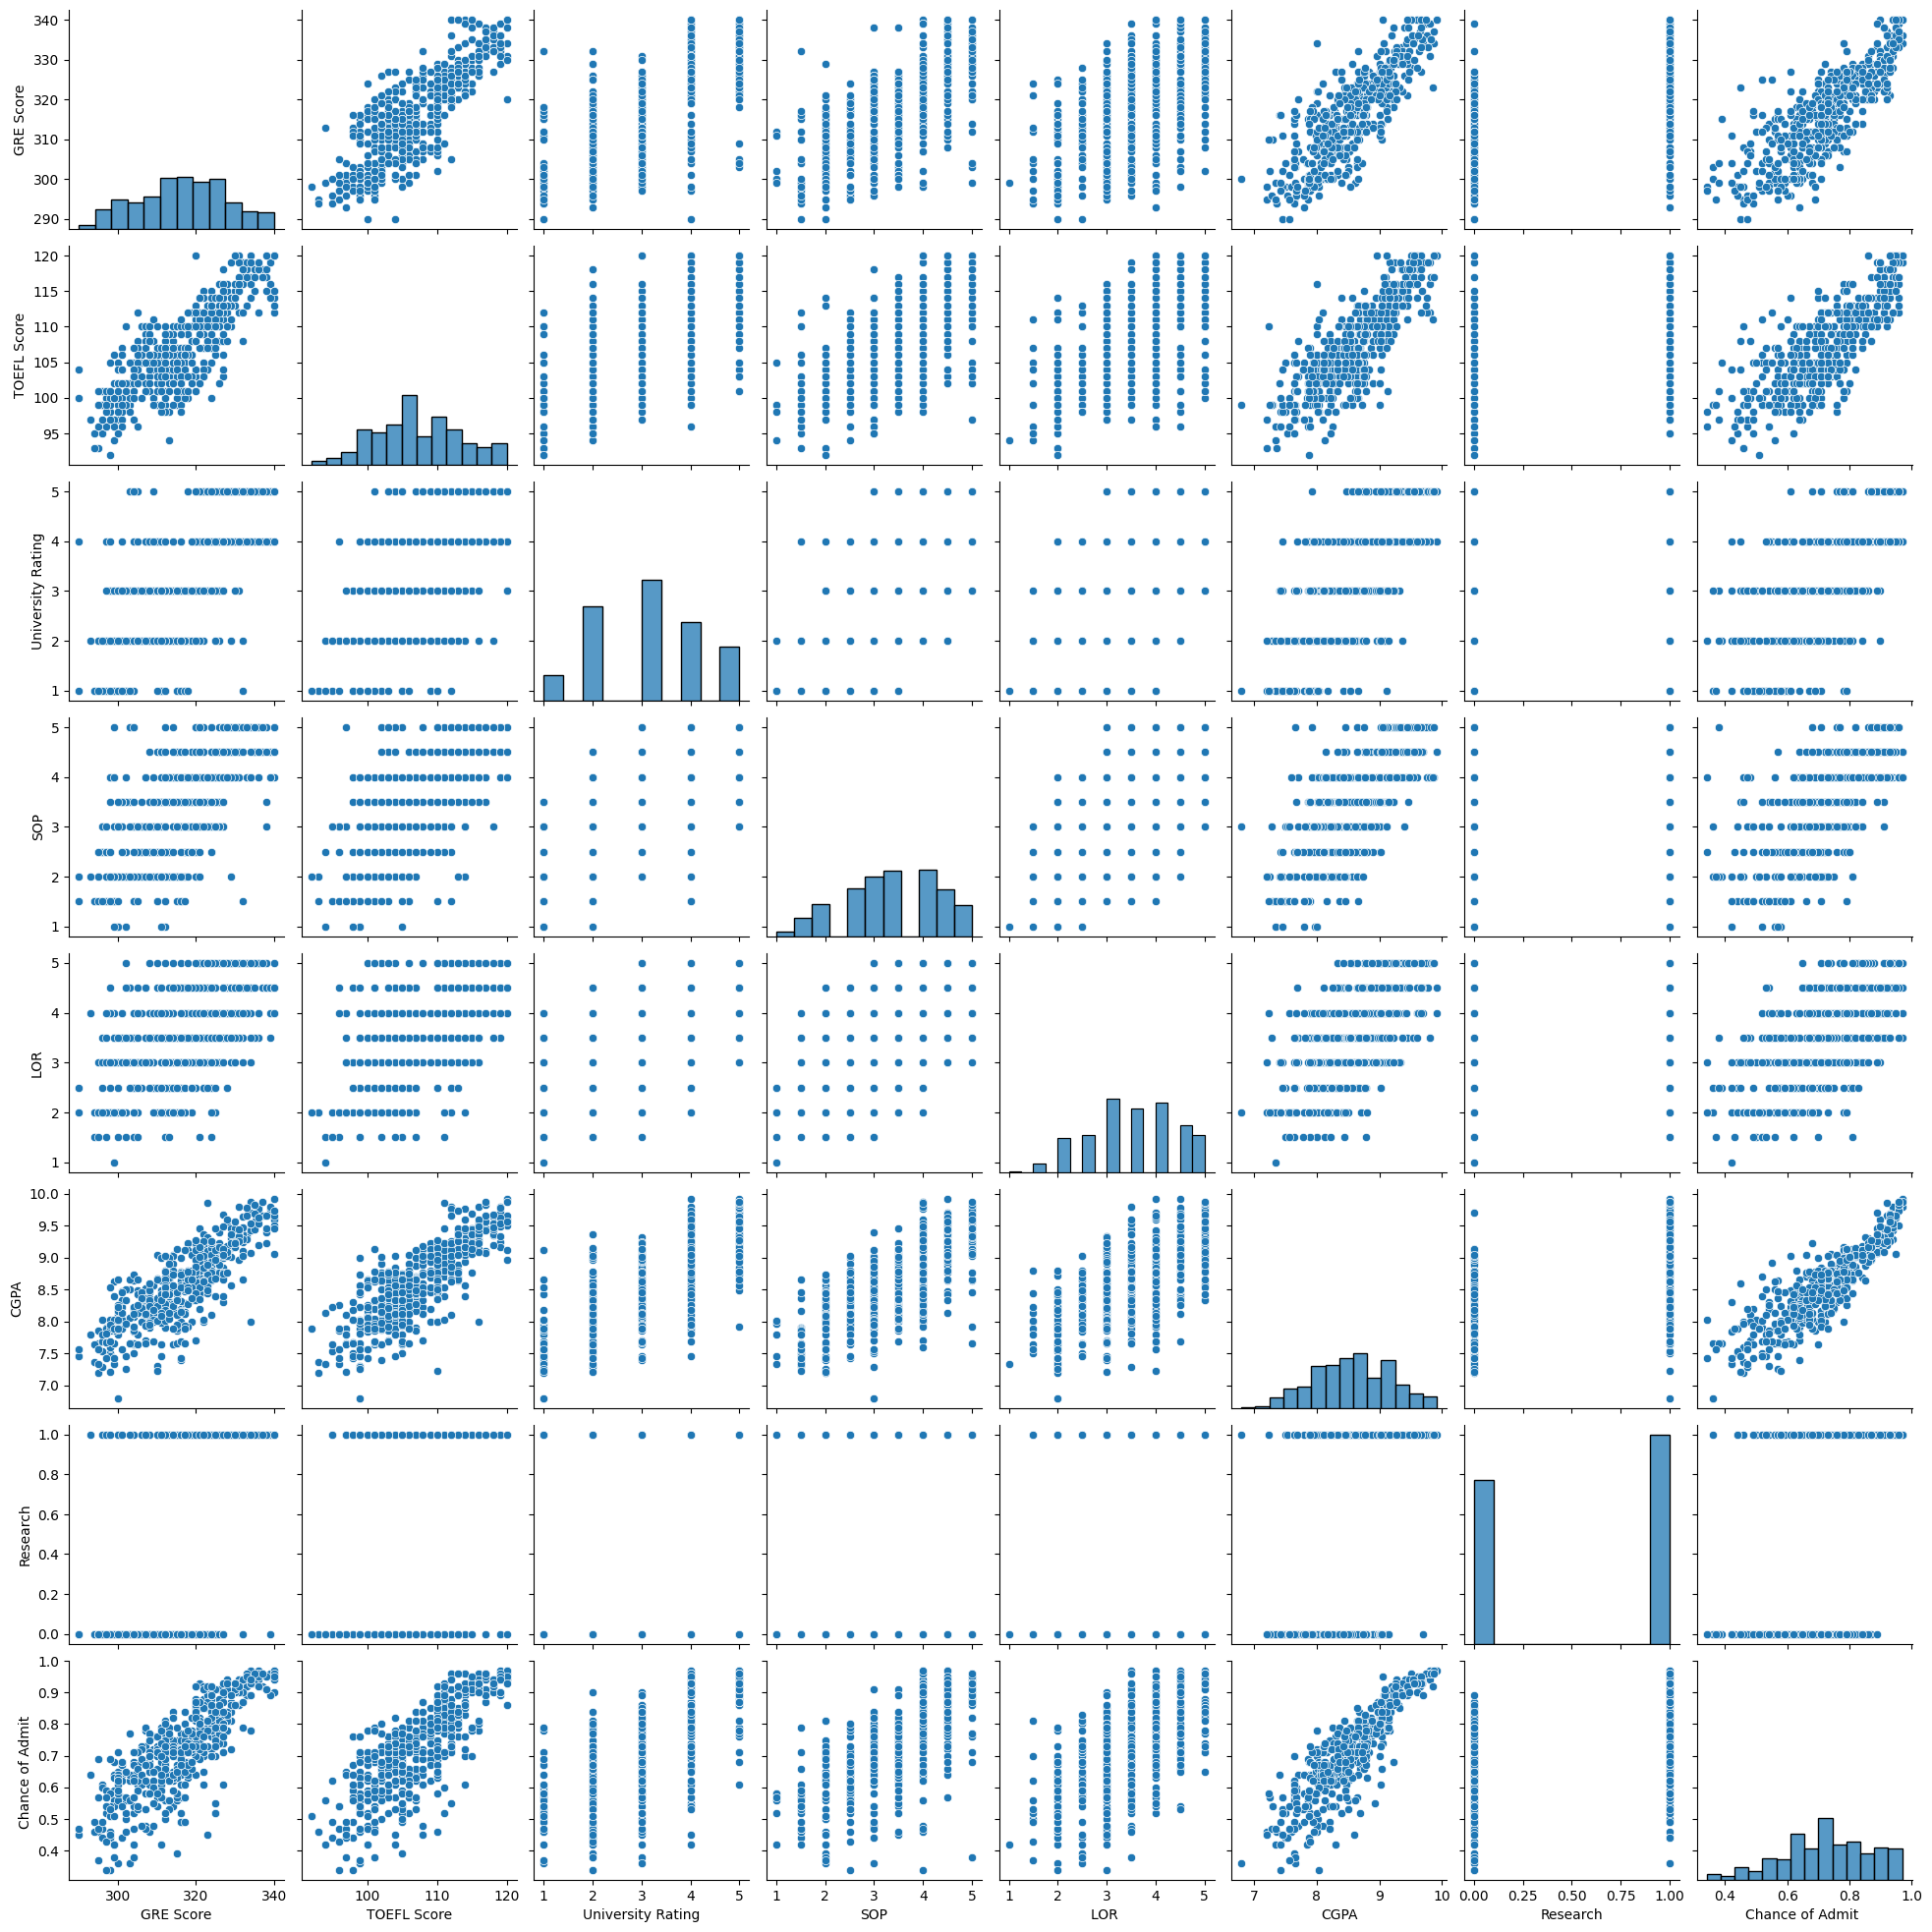

In [ ]:
sns.pairplot(data=df)
plt.show()

**Heat Map**

<ipython-input-14-76886a5ab7a5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df.corr(), annot = True)


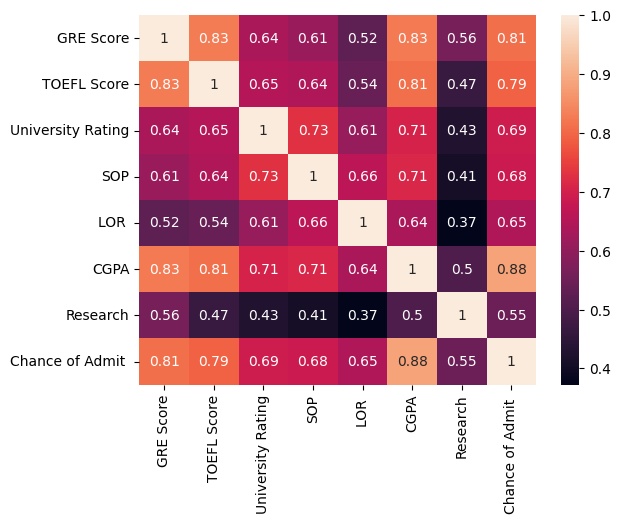

In [ ]:
sns.heatmap(data = df.corr(), annot = True)
plt.show()

From the above pair plot and heat map we can derive the following observations :


*   GRE score and TOEFL score are heavily correlated and are linear with 0.83 .
*   GRE score and CGPA are highly correlated and are linear with 0.83 .
*   TOEFL score and CGPA are highly correlated and are linear with 0.81 .
*   CGPA and chance of admit are highly correlated and are linear with 0.88 .
*   LOR and SOP are slightly correlated with chance of admit and are slightly linear with 0.68 and 0.65 respectively.
*   GRE score and TOEFL score highly correlated with chance of admit and are linear with 0.81 and 0.79 scores repectively.
*   University rating and chance of admit are slightly correlated with score 0.69 .
*   University and CGPA are correlated with 0.71 .
*   SOP and LOR are correlated with CGPA 0.71 and 0.64 respectively.
*   Unversity rating and TOEFL, GRE score are correlated with 0.65 and 0.64 respectively.

## **Linear Regression modelling**

### **Data preparation for modelling**

In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,chance
0,337,118,4,4.5,4.5,9.65,1,0.92,High chance
1,324,107,4,4.0,4.5,8.87,1,0.76,Medium chance
2,316,104,3,3.0,3.5,8.00,1,0.72,low chance
3,322,110,3,3.5,2.5,8.67,1,0.80,Medium chance
4,314,103,2,2.0,3.0,8.21,0,0.65,low chance


dropping the unused column 'chance'

In [ ]:
df.drop('chance', inplace = True, axis = 1)

In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Now lets do target encoding for the categorical features such as University rating and Research by replacing the categories with the mean of occurences.

In [ ]:
df['University Rating'] = df.groupby('University Rating')['Chance of Admit '].transform('mean')
df['Research'] = df.groupby('Research')['Chance of Admit '].transform('mean')
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,0.801619,4.5,4.5,9.65,0.789964,0.92
1,324,107,0.801619,4.0,4.5,8.87,0.789964,0.76
2,316,104,0.702901,3.0,3.5,8.00,0.789964,0.72
3,322,110,0.702901,3.5,2.5,8.67,0.789964,0.80
4,314,103,0.626111,2.0,3.0,8.21,0.634909,0.65


Now we will apply min max scaling to normalize the columns

In [ ]:
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
X = pd.DataFrame(standard_scaler.fit_transform(df[['GRE Score','TOEFL Score', 'University Rating','SOP', 'LOR ', 'CGPA', 'Research' ]]),
                 columns= ['GRE Score','TOEFL Score', 'University Rating','SOP', 'LOR', 'CGPA', 'Research'])

X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.818118,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.818118,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.192946,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.192946,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.979428,-1.387862,-0.523513,-0.606480,-1.128152


In [ ]:
y = df['Chance of Admit ']
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

Now that we have did the normalization and seperated our dependent and independent features lets split the train and test data from it.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state= 10)

In [ ]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
324,-0.130452,-0.525364,-0.192946,-0.377773,-1.064332,-0.407873,-1.128152
252,0.135415,-1.183716,-0.979428,-0.882817,0.017306,-0.060310,0.886405
441,1.376126,0.791338,-1.635449,-1.892906,-0.523513,0.138297,0.886405
427,-0.573563,-1.019128,-0.192946,0.127271,1.639763,0.121746,0.886405
70,1.376126,1.778865,1.703671,1.642404,1.639763,1.760256,0.886405


In [ ]:
y_train.head()

324    0.67
252    0.71
441    0.79
427    0.71
70     0.94
Name: Chance of Admit , dtype: float64

In [ ]:
def get_metrics(y_actual, y_pred):
    n = y_actual.shape[0]
    mse = mean_squared_error(y_actual,y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_actual,y_pred)

    print("mean_squared_error:", round(mse, 3))
    print("mean_absolute_error:", round(mae, 3))
    print("rmse:", round(rmse, 3))

using linear regression from sklearn.linear_model for training the model

In [ ]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

Weights of the trained model

In [ ]:
weights = pd.DataFrame()
weights['feature'] = X.columns
weights['weights'] = lr.coef_
weights

,feature,weights
0,GRE Score,0.025739
1,TOEFL Score,0.011395
2,University Rating,0.005080
3,SOP,0.005766
4,LOR,0.013913
5,CGPA,0.072311
6,Research,0.010602


Intercept of the trained model

In [ ]:
lr.intercept_

0.7227963158513929

R2 score of the model with train data

In [ ]:
lr.score(X_train, y_train)

0.8230695540659498

R2 score of the model with test data

In [ ]:
lr.score(X_test, y_test)

0.8132300179169376

From the above we could see that we have a good r2 score for both the train and test data.

Now lets use statsmodel api to train the Linear regression model

In [ ]:
X_train_sm = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_sm).fit()

print(model.summary())

y_pred = model.predict(X_train_sm)

get_metrics(y_train, y_pred)

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     243.9
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          8.12e-134
Time:                        14:59:31   Log-Likelihood:                 519.80
No. Observations:                 375   AIC:                            -1024.
Df Residuals:                     367   BIC:                            -992.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7228      0.00

From the above we can see the pvalue is more than 0.05 for certain columns which we can remove and check the model performance R2 and adjusted R2 is affected or not

removing University Rating , TOEFL Score and SOP columns from train data

In [ ]:
X_train_sm_1 = sm.add_constant(X_train.drop(['University Rating', 'SOP', 'TOEFL Score'], axis = 1))

model_1 = sm.OLS(y_train, X_train_sm_1).fit()

print(model_1.summary())

y_pred_1 = model_1.predict(X_train_sm_1)

get_metrics(y_train, y_pred_1)

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     418.9
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          6.24e-136
Time:                        14:59:41   Log-Likelihood:                 515.67
No. Observations:                 375   AIC:                            -1021.
Df Residuals:                     370   BIC:                            -1002.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7228      0.003    226.833      0.0

The new model has R2 = 0.819 and Adjusted R2 = 0.817 which is slightly less than the previous model but we were able to reduce 3 features and also maintaining almost the same performance of training data.

## **Linear Regression Assumptions**


*   There exist a linear function
*   No multicollinearity
*   Errors are normally distributed
*   No heteroskedasticity
*   There is no auto correlation (related to time series)


### **Checking the linearity**

In the **Visualization section** we have plotted pair plot and heat map and found the below points :

*   GRE score and TOEFL score are heavily correlated and are linear with 0.83 .
*   GRE score and CGPA are highly correlated and are linear with 0.83 .
*   TOEFL score and CGPA are highly correlated and are linear with 0.81 .
*   CGPA and chance of admit are highly correlated and are linear with 0.88 .
*   LOR and SOP are slightly correlated with chance of admit and are slightly linear with 0.68 and 0.65 respectively.
*   GRE score and TOEFL score highly correlated with chance of admit and are linear with 0.81 and 0.79 scores repectively.
*   University rating and chance of admit are slightly correlated with score 0.69 .
*   University and CGPA are correlated with 0.71 .
*   SOP and LOR are correlated with CGPA 0.71 and 0.64 respectively.
*   Unversity rating and TOEFL, GRE score are correlated with 0.65 and 0.64 respectively.

### **Checking for Multicollinearity**

In [ ]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
5,CGPA,4.78
0,GRE Score,4.39
1,TOEFL Score,3.99
3,SOP,2.82
2,University Rating,2.51
4,LOR,2.03
6,Research,1.50


From the above we can see that we dont have any multicollinearity among our features and all of them are essential features.

But from our above model training we removed columns like University rating, TOEFL score and SOP as they were less significant so lets remove them and check the VIF once again

In [ ]:
vif = pd.DataFrame()
vif['features'] = X_train_sm_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm_1,i) for i in range(X_train_sm_1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
3,CGPA,3.84
1,GRE Score,3.37
2,LOR,1.71
4,Research,1.50
0,const,1.00


Now with the less significant features removed we have a good model with features having the same predicting power as before. Hence this assumption also is right.

### **Normality and Mean of Residuals**

mean_squared_error: 0.004
mean_absolute_error: 0.044
rmse: 0.061
mean of errors -1.912544197087603e-16


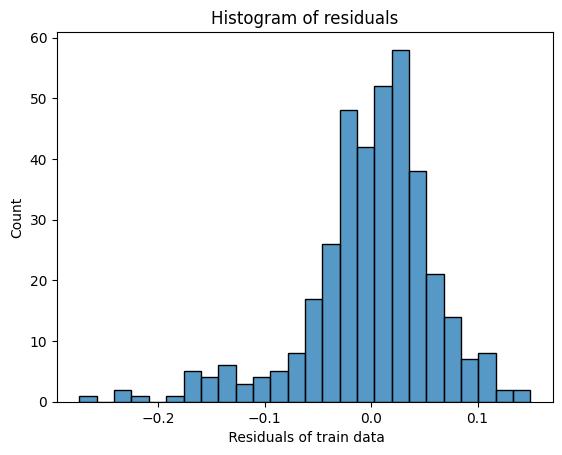

In [ ]:
X_train_sm_2 = sm.add_constant(X_train.drop(['University Rating', 'SOP', 'TOEFL Score'], axis = 1))

model_2 = sm.OLS(y_train, X_train_sm_2).fit()

y_pred_2 = model_2.predict(X_train_sm_2)

get_metrics(y_train, y_pred_2)
errors = y_train - y_pred_2

print("mean of errors", errors.mean())

sns.histplot(errors)
plt.xlabel(" Residuals of train data")
plt.title("Histogram of residuals")
plt.show()

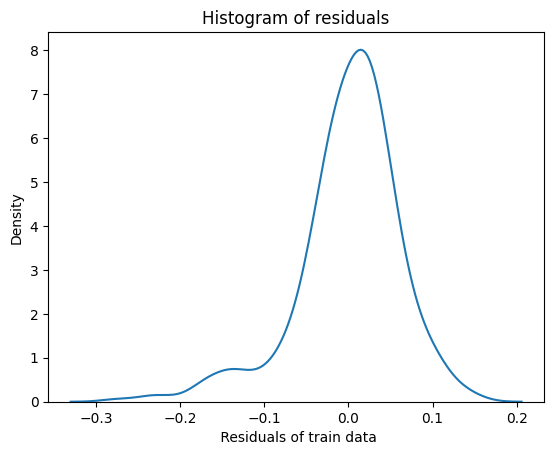

In [ ]:
sns.kdeplot(errors)
plt.xlabel(" Residuals of train data")
plt.title("Histogram of residuals")
plt.show()

From the above histogram plot and kde plot of residuals we can see that the errors are almost normal in nature, Hence this assumption is also right.

### **Check for Heteroskedasticity**

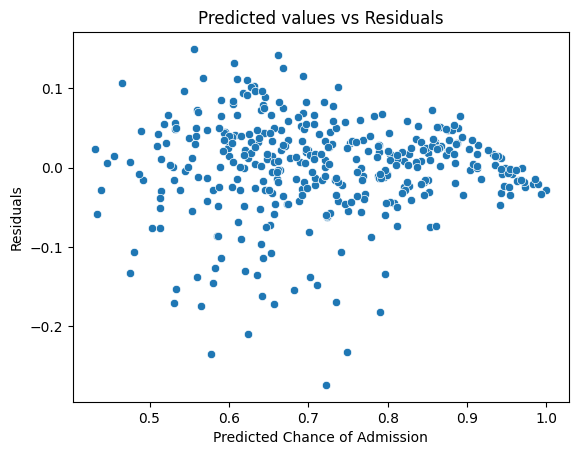

In [ ]:
sns.scatterplot(x=y_pred,y=errors)
plt.xlabel("Predicted Chance of Admission")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")
plt.show()

From visual analysis we cannot confirm that the model doesnt have heteroskedasticity. So we will perform gold fled quandt test.

**Gold Fled Quandt Test**

we will consider alpha = 0.05

H0 : Heteroskedasticity not present

Ha : Heteroskedasticity is present

In [ ]:
F_stat, p_value, order = sms.het_goldfeldquandt(y_train, X_train_sm_2)
print("F stat",F_stat)
print("P value", p_value)

if p_value < 0.05:
  print("Reject H0 : Heteroskedasticity is present")
else:
  print("Failed to reject H0 : Heteroskedasticity not present")

F stat 0.7977127384984963
P value 0.936069159309467
Failed to reject H0 : Heteroskedasticity not present


By performing the above test we can conclude that there is no heteroskedasticity present in the model.

### **Checking Auto Correlation**

To check the auto correlation of the features lets perform Durbin Watson test

we will consider alpha = 0.05

H0 : There is no correlation

Ha : Autocorrelation is present.

Also for this test following are the assumptions

test_stat = 2 --> no auto correlation

test_stat < 2 --> positive auto correlation

test_stat > 2 --> negative auto correlation

also as a general thumb rule the test stat value which lies  between the range of 1.5 and 2.5 are considered normal.

In [ ]:
durbin_watson(model.resid)

1.9555103657910107

So by performing the durbin watson test to detect auto correlation we got a score of 1.95 which is approx. close to 2 and lies in the agreable region. Hence we can conclude that there is no Auto correlation among our features.

### ***Conclusion***:

Following are the findings of our assumption test:

1. There is linearity among the independent features and the dependent features.
2. There is no multicollinearity between the features.
3. The residuals are normally distributed.
4. There is no heteroskedasticity observed in the errors.
5. There is no problem due to auto correlation in our model.

Hence from our above assumptions test we can conclude that model 2 is the optimum model and lets try to find out the metrics for the same.

In [ ]:
X_test_1 = sm.add_constant(X_test.drop(['University Rating', 'SOP', 'TOEFL Score'], axis = 1))
y_pred_test = model_2.predict(X_test_1)
get_metrics(y_test, y_pred_test )
print(model_2.summary())

mean_squared_error: 0.003
mean_absolute_error: 0.041
rmse: 0.058
                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     418.9
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          6.24e-136
Time:                        15:06:06   Log-Likelihood:                 515.67
No. Observations:                 375   AIC:                            -1021.
Df Residuals:                     370   BIC:                            -1002.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

Above are the metrics for the final model and the results seems to be satisfactory with the test data.

## **Applying Lasso and Ridge Regression**

In [ ]:
# Transform the features into polynomial features
degree = 5
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
def adjusted_r2(r2, p, n):
    """
    n: no of samples
    p: no of predictors
    r2: r2 score
    """
    adj_r2 = 1 - (((1-r2)*(n-1)) / (n-p-1))
    return adj_r2

In [ ]:
lr_1 = LinearRegression()

lr_1.fit(X_train_poly, y_train)

y_pred_train_poly = lr_1.predict(X_train_poly)
print("Train data scores")
r2_train = r2_score(y_train,y_pred_train_poly)
adjusted_r2_train = adjusted_r2(r2_train,X_train_poly.shape[1], X_train_poly.shape[0])
print("r2 :", r2_train)
print("Ajusted r2 :", adjusted_r2_train)
get_metrics(y_actual=y_train, y_pred=y_pred_train_poly)


Train data scores
r2 : 1.0
Ajusted r2 : 1.0
mean_squared_error: 0.0
mean_absolute_error: 0.0
rmse: 0.0


from the above we can see that degree 5 over fits the model so now lets use lasso and ridge regression to come up with optimum model.

In [ ]:
lasso_model = Lasso(alpha=0.01)  # Alpha is the regularization strength
ridge_model = Ridge(alpha=1)  # Alpha is the regularization strength

In [ ]:
lasso_model.fit(X_train_poly, y_train)
ridge_model.fit(X_train_poly, y_train)

Ridge(alpha=1)

In [ ]:
lasso_y_train_pred = lasso_model.predict(X_train_poly)
ridge_y_train_pred = ridge_model.predict(X_train_poly)

In [ ]:
print("Lasso Train data scores")
r2_train_lasso = r2_score(y_train,lasso_y_train_pred)
adjusted_r2_train_lasso = adjusted_r2(r2_train_lasso,X_train_poly.shape[1], X_train_poly.shape[0])
print("r2 :", r2_train_lasso)
print("Ajusted r2 :", adjusted_r2_train_lasso)
get_metrics(y_actual=y_train, y_pred=lasso_y_train_pred)

print("---------------------")

print("Ridge Train data scores")
r2_train_ridge = r2_score(y_train,ridge_y_train_pred)
adjusted_r2_train_ridge = adjusted_r2(r2_train_ridge,X_train_poly.shape[1], X_train_poly.shape[0])
print("r2 :", r2_train_ridge)
print("Ajusted r2 :", adjusted_r2_train_ridge)
get_metrics(y_actual=y_train, y_pred=ridge_y_train_pred)

Lasso Train data scores
r2 : 0.8171851261646087
Ajusted r2 : 1.16357120290535
mean_squared_error: 0.004
mean_absolute_error: 0.044
rmse: 0.062
---------------------
Ridge Train data scores
r2 : 0.9753181833028692
Ajusted r2 : 1.0220837307290118
mean_squared_error: 0.001
mean_absolute_error: 0.014
rmse: 0.023


From the above we could see that by applying L1(Lasso) and L2(Ridge) regularization methods we could drastically reduce the overfitting issue caused by a polynomial features.

## **Insights**



*   After applying all the tests above we come to the conculsion that the data provided to us can be modeled using Linear Regression model.
*   Based on the pvalues which we got from the stats model we were able to eliminate features like 'University Rating', 'SOP' and 'TOEFL Score'
*   Students having high GRE Score and TOEFL Score have high chances of getting admission in Unviersities with high rating.
*   Students securing high CGPA have very high chance of admission.
*   Research is an very important feature to get admission.
*   A good LOR scores helps the student to get admission.
*   The final model which we derived has a good predicting power with just 4 features. Rest of the features we eliminated.
*   The main 4 features are GRE score, LOR , CGPA and Research.






## **Recommendations**

*  Students looking for Admission in the Ivy league colleges should aim for high TOEFL, GRE and CGPA.
*  Universities can be identified by looking at their ratings.
*  Jamboree can use the above analysis to mention on their website the important factors for admission in Ivy league colleges.
*  Jamboree can help the students improve TOEFL, GRE and CGPA score of the students by introducing practice papers, mock test, etc.
* Jamboree could conduct awarness sessions to students to highlight the importance of the main factors so that they could encourage more students for the admissions through them.
* Having a research oriented background adds weightage, so Jamboree could encourage students to do research and help them publish papers which increases their admission chances.
* Jamboree can use the above designed model which is an optimal model with more than 80% accuracy for predicting the chances of admission.